In [2]:
#Level 1 – Task 1: Top Cuisines Analysis


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_path = "Dataset.csv"
df = pd.read_csv('Dataset .csv')

In [15]:
df_valid = df.dropna(subset=['Cuisines']).copy()

In [17]:
df_valid["Cuisines_List"] = df_valid["Cuisines"].str.split(",")
df_valid["Cuisines_List"] = df_valid["Cuisines_List"].apply(lambda x: [i.strip() for i in x])


In [21]:
df_exploded = df_valid.explode("Cuisines_List")

In [23]:
cuisine_counts = (
    df_exploded["Cuisines_List"]
    .value_counts()
    .rename_axis("Cuisine")
    .reset_index(name="Restaurant_Count")
)

In [25]:
total_restaurants = len(df)
total_valid = len(df_valid)

cuisine_counts["Percent_of_All_Restaurants"] = (
    cuisine_counts["Restaurant_Count"] / total_restaurants * 100
)
cuisine_counts["Percent_of_Valid_Cuisine_Rows"] = (
    cuisine_counts["Restaurant_Count"] / total_valid * 100
)

In [27]:
top3 = cuisine_counts.head(3)
print("🎯 Top 3 Cuisines:")
print(top3)

🎯 Top 3 Cuisines:
        Cuisine  Restaurant_Count  Percent_of_All_Restaurants  \
0  North Indian              3960                   41.461627   
1       Chinese              2735                   28.635745   
2     Fast Food              1986                   20.793634   

   Percent_of_Valid_Cuisine_Rows  
0                      41.500734  
1                      28.662754  
2                      20.813247  


In [29]:
top10 = cuisine_counts.head(10)

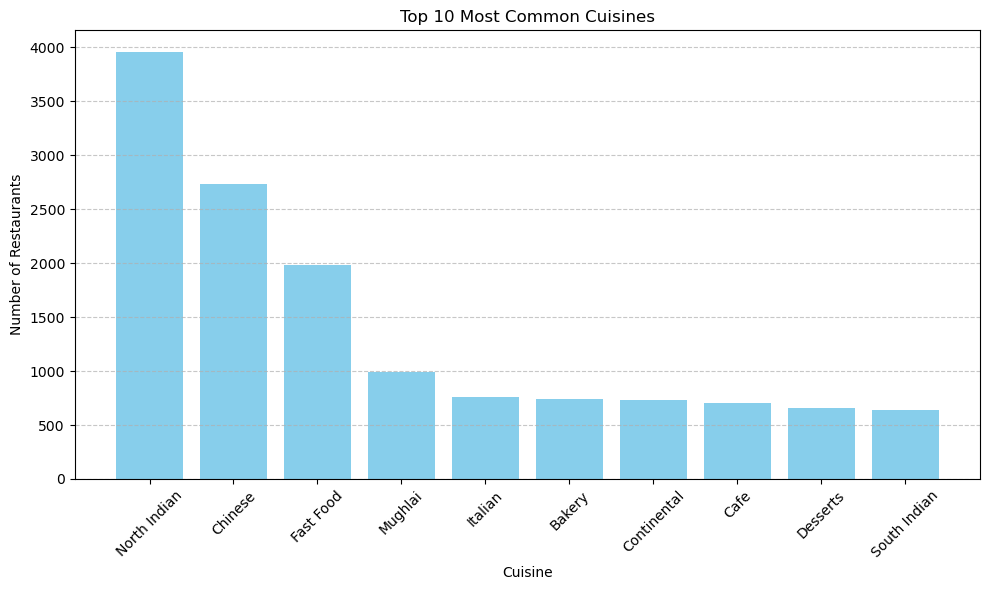

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(top10["Cuisine"], top10["Restaurant_Count"], color="skyblue")
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



In [33]:
print(f"\nTotal restaurants in dataset: {total_restaurants}")
print(f"Restaurants with valid cuisine data: {total_valid}")


Total restaurants in dataset: 9551
Restaurants with valid cuisine data: 9542


In [44]:
plt.tight_layout()
plt.savefig("Top_Cuisines_Barchart.png")  # Save to same folder as notebook
plt.show()

<Figure size 640x480 with 0 Axes>